In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [111]:
def eval_sample(x,gaussian_coeffs,start_freq=1):
    k=np.linspace(start_freq,start_freq+gaussian_coeffs.shape[0]-1,gaussian_coeffs.shape[0])
    sinuses=np.sin(np.pi*k[None,:]*x[:,:1])[:,:,None]*np.sin(np.pi*k[None,:]*x[:,1:])[:,None,:]

    coeffs=(np.pi)**2*(k[None,:]**2+k[:,None]**2)
    return np.sum(sinuses*gaussian_coeffs/coeffs,axis=(1,2))

def eval_sample(x,gaussian_coeffs, start_freq=1):
    k = np.linspace(
        start_freq, start_freq + gaussian_coeffs.shape[0] - 1, gaussian_coeffs.shape[0]
    )
    sinuses = (
        np.sin(np.pi * k[None, :] * x[:, :1])[:, :, None]
        * np.sin(np.pi * k[None, :] * x[:, 1:])[:, None, :]
    )

    coeffs = np.pi**2 * (k[None, :] ** 2 + k[:, None] ** 2)
    vals = np.sum(sinuses * gaussian_coeffs / coeffs, axis=(1, 2))
    return np.where(vals >= 0, 12, 3)

In [121]:

np.random.seed(1)

In [110]:
eval_sample(np.array([[1,1]]),gaussian_coeffs)

array([-2.71483023e-32])

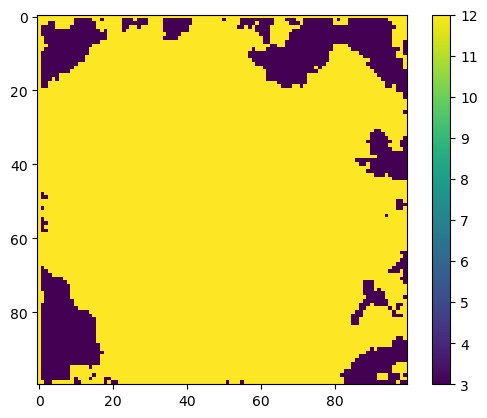

In [122]:
x = np.linspace(0, 1, 100,endpoint=True)
y = np.linspace(0, 1, 100,endpoint=True)
gaussian_coeffs=np.random.normal(size=(100,100))
xv, yv = np.meshgrid(x, y)
X=np.stack([xv.flatten(),yv.flatten()],axis=-1)
Z=eval_sample(X,gaussian_coeffs,1).reshape((100,100))
plt.imshow(Z)
plt.colorbar()

In [49]:
Z

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.63330514e-03, -3.09462988e-04, ...,
         1.34025944e-03,  5.33523005e-04, -1.93067176e-17],
       [ 0.00000000e+00,  9.19702825e-04,  3.17021361e-03, ...,
        -9.62658725e-05, -9.26136068e-05, -1.38399690e-17],
       ...,
       [ 0.00000000e+00,  9.58531870e-05,  4.41642597e-03, ...,
         2.25024407e-03,  2.03692333e-03,  1.16123738e-17],
       [ 0.00000000e+00,  6.08200321e-05,  1.77001197e-03, ...,
         3.93237038e-05,  1.22757582e-03,  4.09603301e-18],
       [ 0.00000000e+00,  3.06551905e-18,  1.11018442e-18, ...,
        -1.03249874e-17,  2.83255799e-17,  2.59018514e-31]])

In [60]:
def mat_fun(ts, coors, mode=None, **kwargs):
    if mode == 'qp':
        nqp, dim = coors.shape
        alpha = np.zeros((nqp,1,1), dtype=np.float64)
        alpha[0:nqp // 2,...] = 12
        alpha[nqp // 2:,...] = 13
        K = np.eye(dim, dtype=np.float64)
        K2 = np.tile(K, (nqp,1,1))
        out = {
            'K' : K2,
            'f_1': 20.0 * np.ones((nqp,1,1), dtype=np.float64),
            'f_2': -20.0 * np.ones((nqp,1,1), dtype=np.float64),
            'G_alfa': 1.2345 * alpha,
            }

        return out

In [63]:
mat_fun(None,np.random.rand(24,2),mode='qp')['K'].shape

(24, 2, 2)

In [64]:
import meshio
mesh = meshio.read('new_square_2.vtk')

In [72]:
mesh.point_data

{'p': array([  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          2.05896969,   0.13018984,  -2.31143815,  -5.1895948 ,
          0.74618229,  -3.90566206,  -1.98994214,   5.04963343,
          1.10737835,   2.24505009,   9.90188973,  -2.37908808,
          3.03455484,   4.7434682 ,  14.33030191,  -2.73363955,
          1.37254271,   1.34398452,  -0.6089934 ,   0.19965939,
          1.90106218,   0.24133848,